**Task 4: Generate Descriptive Statistics and Visualizations**


and

**Task 5: Use the appropriate tests to answer the questions provided**

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
import matplotlib.pyplot as plt

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

**Dataset varibales descriptions:**
  

*   CRIM - per capita crime rate by townList item
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft

* INDUS - proportion of non-retail business acres per town.

*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*   NOX - nitric oxides concentration (parts per 10 million)

*   RM - average number of rooms per dwelling

*   AGE - proportion of owner-occupied units built prior to 1940

*   DIS - weighted distances to five Boston employment centres

*   RAD - index of accessibility to radial highways

*   TAX - full-value property-tax rate per $10,000

*   PTRATIO - pupil-teacher ratio by town

*  LSTAT - % lower status of the population

*   MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


**Task**: Proivde a boxplot for the Median value of owner-occupied homes

Text(0.5, 1.0, 'Median value of owner-occupied homes')

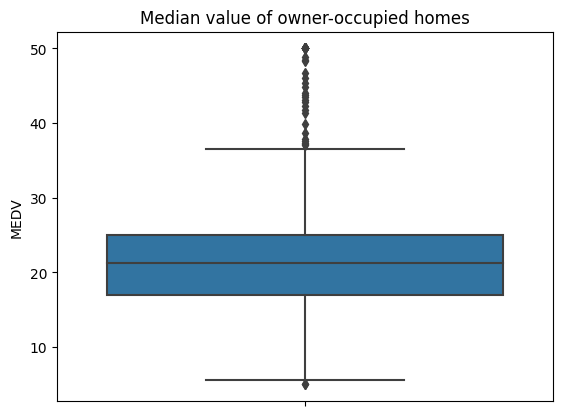

In [ ]:
ax = sns.boxplot(y="MEDV", data=boston_df)
ax.set_title('Median value of owner-occupied homes')


**Task:** Provide a bar plot for the Charles river variable

Text(0.5, 1.0, 'Number of homes near the Charles River')

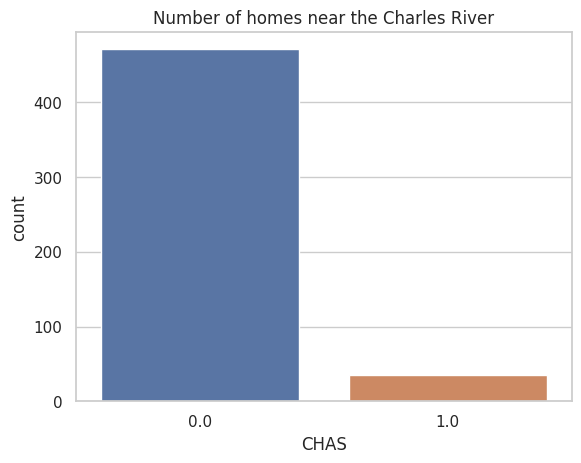

In [ ]:
sns.set(style="whitegrid")
ax2 = sns.countplot(x="CHAS", data=boston_df)
ax2.set_title('Number of homes near the Charles River')

**Task:** Provide a boxplot for the MEDV variable vs the AGE variable

In [ ]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_group'] = 'between 34 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_group'] = '70 years and older'

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

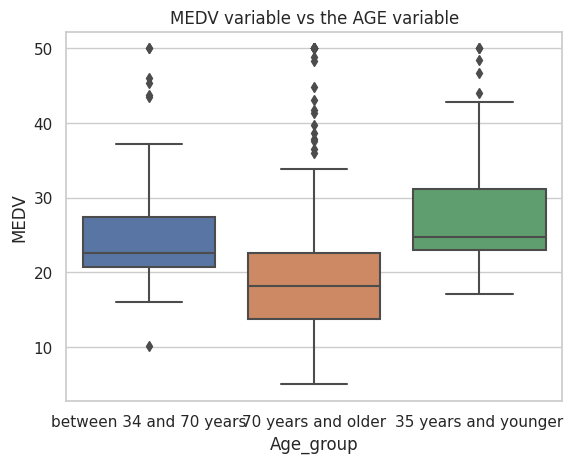

In [ ]:
ax3 = sns.boxplot(x='Age_group', y="MEDV",
                 data=boston_df)
ax3.set_title('MEDV variable vs the AGE variable')

Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

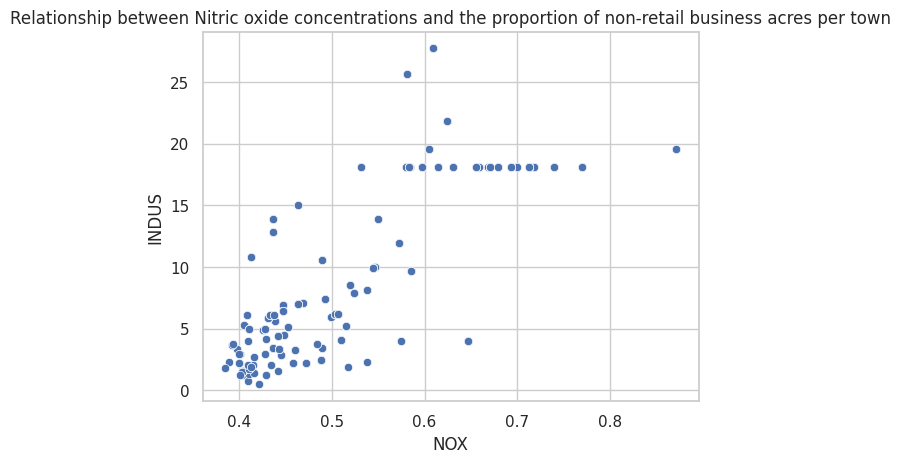

In [ ]:
ax4 = sns.scatterplot(x='NOX', y= 'INDUS', data=boston_df)
ax4.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

Based on the scatterplot, there seens to be a positive linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

**Task**: Create a histogram for the pupil to teacher ratio variable

<ipython-input-12-4ce37298817f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax5 = sns.distplot(boston_df['PTRATIO'], kde=False)


Text(0.5, 1.0, 'Pupil to teacher ratio variable')

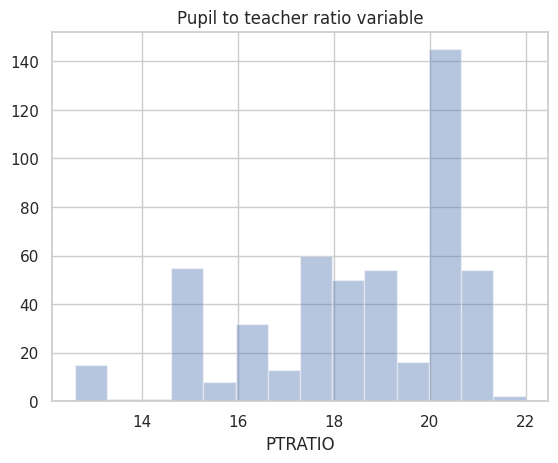

In [ ]:
ax5 = sns.distplot(boston_df['PTRATIO'], kde=False)
ax5.set_title('Pupil to teacher ratio variable')


# **Task 5: Use the appropriate tests to answer the questions provided.**

**Question 1**: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothese:

Null Hypothesis: There's no significant difference in median value of houses bounded by the Charles river

Alternative Hypothese: There's a significant difference in median value between houses bounded by the Charles River

In [ ]:

boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] ='AWAY'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'CLOSE'
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_group,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 34 and 70 years,AWAY
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,AWAY
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 34 and 70 years,AWAY
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 34 and 70 years,AWAY
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 34 and 70 years,AWAY


In [ ]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'AWAY']['MEDV'],
boston_df[boston_df['CHAS_T'] == 'CLOSE']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

The p-value is less than 0.05, we reject the Null Hypothesis, meaning there's a statistical difference between houses close to the Charles River and houses away from the river.

**Question 2**: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis

Null Hypothesis: There's no significant difference in Median value of houses built prior to 1940

Alternative Hypothesis: There's a significant difference in Median value houses built prior to 1940

In [ ]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


We can conculde, since the p-value is less than 0.05, we reject the Null Hyothesis. Meaning there's a significant difference in Median values of houses built prior to 1940

**Question 3:** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypothesis**

Null Hypothesis: There is no correlation between Nitric oxide concentration and
proportion of non-retail business acres per town

Alternative Hypothesis: There is a correlation between Nitric oxide concentration and proportion of non-retail business acres per town

In [ ]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

The Pearson Coefficient is a positive 0.7636 with a p-value less than 0.05, we reject the Null Hypothesis, meaning there is a positive correlation between Nitric oxide and proportion of non-retail buiness acres per town

**Questions 4**:  What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


H_0: B1 = 0 (Additional weighted distance to the five Boston employment centers has no effect the median value of owner occupied homes)

H_1: B1 is not equal to 0 (Additional weighted distance to the five Boston employment centers has an effect on the median value of owner occupied homes)

In [ ]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        13:48:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conculsion: DIS coef of 1.0916 indicates that an addtional weighted distance to the five Boston employment centers increase the mdeian value of owner occupied homes by 1.0916